In [9]:
!pip install wandb

In [1]:
import wandb
wandb.login()

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [2]:
!pip install ultralytics
from IPython import display
display.clear_output()

import ultralytics

In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet



In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="lqigRvMBwxOG5h9OGHlq")
project = rf.workspace("xxxxx").project("yellow-ilijm")
version = project.version(4)
dataset = version.download("yolov9")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.9/74.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 33.3 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.12.1
  Attempting uninstall: certifi
    Found existing installation: certifi 20


Extracting Dataset Version Zip to yellow-4 in yolov9:: 100%|██████████| 1312/1312 [00:00<00:00, 8393.43it/s]


In [14]:
model = YOLO('yolov8s.pt')

100%|██████████| 21.5M/21.5M [00:00<00:00, 272MB/s]


In [ ]:
%load /kaggle/working/datasets/yellow-4/data.yaml
names:
- yellow smoke
nc: 1
roboflow:
  license: MIT
  project: yellow-ilijm
  url: https://universe.roboflow.com/xxxxx/yellow-ilijm/dataset/4
  version: 4
  workspace: xxxxx
test: ../test/images
train: ../train/images
val: ../valid/images


In [8]:
!yolo task=detect mode=train model='yolov8s.pt' data=/kaggle/working/yellow-4/data.yaml epochs=25 imgsz=800 plots=True lr0= 0.00934,
lrf= 0.01069
momentum=0.92655
weight_decay=0.00052
warmup_epochs= 3.19711
warmup_momentum=0.84869
box= 7.36394
cls= 0.5339
dfl=1.49163
hsv_h= 0.01599
hsv_s= 0.8609
hsv_v=0.37263
degrees= 0.0
translate= 0.09974
scale= 0.52781
shear= 0.0
perspective= 0.0
flipud= 0.0
fliplr=0.4846,
bgr= 0.0,
mosaic= 0.99223,
mixup= 0.0,
copy_paste= 0.0)

Traceback (most recent call last):
  File "/opt/conda/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/cfg/__init__.py", line 513, in entrypoint
    check_dict_alignment(full_args_dict, {a: ""})
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/cfg/__init__.py", line 323, in check_dict_alignment
    raise SyntaxError(string + CLI_HELP_MSG) from e
SyntaxError: 'evolve' is not a valid YOLO argument. 

    Arguments received: ['yolo', 'task=detect', 'mode=train', 'model=yolov8s.pt', 'data=/kaggle/working/yellow-4/data.yaml', 'epochs=25', 'imgsz=800', 'plots=True', 'evolve']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'pose', 'classify', 'obb', 'detect', 'segment'}
                MODE (required) is one of {'benchmark', 'train', 'predict', 'val', 'track', 'export'}
                ARGS (optional) are any number of custom 'arg=val

In [5]:

%%writefile /kaggle/working/yellow-4/data.yaml
names:
- yellow smoke
nc: 1
roboflow:
  license: MIT
  project: yellow-ilijm
  url: https://universe.roboflow.com/xxxxx/yellow-ilijm/dataset/4
  version: 4
  workspace: xxxxx
test: ../test/images
train: ../train/images
val: ../valid/images


Overwriting /kaggle/working/yellow-4/data.yaml


In [ ]:
%cd {HOME}
Image(filename='runs/detect/train/confusion_matrix.png', width=600)

In [ ]:
Image(filename='/kaggle/working/runs/detect/train/results.png', width=600)

In [19]:
!yolo task=detect mode=val model=/kaggle/working/runs/detect/train4/weights/best.pt data=/kaggle/working/yellow-4/data.yaml 

Ultralytics YOLOv8.2.16 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /kaggle/working/yellow-4/valid/labels.cache... 31 images, 0 backgr
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         31         32      0.934          1      0.984      0.792
Speed: 4.5ms preprocess, 17.8ms inference, 0.0ms loss, 73.1ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=/kaggle/input/yolov8s/best.pt conf=0.25 source=/kaggle/input/imageee/img1.jpg save=True

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [25]:
%cd {HOME}
!yolo task=detect mode=predict model=/kaggle/input/yolov8s/best.pt conf=0.25 source=/kaggle/input/videosample/sample.mp4 save=True

[Errno 2] No such file or directory: '{HOME}'
/kaggle/working
Ultralytics YOLOv8.2.16 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

video 1/1 (frame 1/911) /kaggle/input/videosample/sample.mp4: 480x800 (no detections), 67.6ms
video 1/1 (frame 2/911) /kaggle/input/videosample/sample.mp4: 480x800 (no detections), 9.2ms
video 1/1 (frame 3/911) /kaggle/input/videosample/sample.mp4: 480x800 (no detections), 7.4ms
video 1/1 (frame 4/911) /kaggle/input/videosample/sample.mp4: 480x800 (no detections), 7.5ms
video 1/1 (frame 5/911) /kaggle/input/videosample/sample.mp4: 480x800 (no detections), 7.6ms
video 1/1 (frame 6/911) /kaggle/input/videosample/sample.mp4: 480x800 (no detections), 7.5ms
video 1/1 (frame 7/911) /kaggle/input/videosample/sample.mp4: 480x800 (no detections), 7.5ms
video 1/1 (frame 8/911) /kaggle/input/videosample/sample.mp4: 480x800 (no detections), 7.4ms
video 1/1 (frame 9

In [5]:
!yolo help


    Arguments received: ['yolo', 'help']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'segment', 'classify', 'obb', 'pose', 'detect'}
                MODE (required) is one of {'train', 'benchmark', 'val', 'export', 'predict', 'track'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at https://docs.ultralytics.com/usage/cfg or with 'yolo cfg'

    1. Train a detection model for 10 epochs with an initial learning_rate of 0.01
        yolo train data=coco8.yaml model=yolov8n.pt epochs=10 lr0=0.01

    2. Predict a YouTube video using a pretrained segmentation model at image size 320:
        yolo predict model=yolov8n-seg.pt source='https://youtu.be/LNwODJXcvt4' imgsz=320

    3. Val a pretrained detection model at batch-size 1 and image size 640:
        yolo val model=yolov8n.pt data=coco8.yaml batch=1 i

In [15]:
model=YOLO('yolov8s.pt')

Tuner: Initialized Tuner instance with 'tune_dir=runs/detect/tune3'
Tuner: 💡 Learn about tuning at https://docs.ultralytics.com/guides/hyperparameter-tuning
Tuner: Starting iteration 1/300 with hyperparameters: {'lr0': 0.01, 'lrf': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'box': 7.5, 'cls': 0.5, 'dfl': 1.5, 'hsv_h': 0.015, 'hsv_s': 0.7, 'hsv_v': 0.4, 'degrees': 0.0, 'translate': 0.1, 'scale': 0.5, 'shear': 0.0, 'perspective': 0.0, 'flipud': 0.0, 'fliplr': 0.5, 'bgr': 0.0, 'mosaic': 1.0, 'mixup': 0.0, 'copy_paste': 0.0}
Ultralytics YOLOv8.2.16 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/working/yellow-4/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=False, save_period=-1, cache=False, device=None, workers=8, project=None, name=train17, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, determ

wandb: ERROR api_key not configured (no-tty). call wandb.login(key=[your_api_key])
Traceback (most recent call last):
  File "/opt/conda/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/cfg/__init__.py", line 583, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/model.py", line 674, in train
    self.trainer.train()
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/trainer.py", line 199, in train
    self._do_train(world_size)
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/trainer.py", line 313, in _do_train
    self._setup_train(world_size)
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/trainer.py", line 226, in _setup_train
    self.run_callbacks("on_pretrain_routine_start")
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/trainer.py", line 162, i

WARNING ❌️ training failure for hyperparameter tuning iteration 1
Command '['yolo', 'train', 'task=detect', 'mode=train', 'model=yolov8s.pt', 'data=/kaggle/working/yellow-4/data.yaml', 'epochs=30', 'time=None', 'patience=100', 'batch=16', 'imgsz=640', 'save=False', 'save_period=-1', 'cache=False', 'device=None', 'workers=8', 'project=None', 'name=None', 'exist_ok=False', 'pretrained=True', 'optimizer=AdamW', 'verbose=True', 'seed=0', 'deterministic=True', 'single_cls=False', 'rect=False', 'cos_lr=False', 'close_mosaic=10', 'resume=False', 'amp=True', 'fraction=1.0', 'profile=False', 'freeze=None', 'multi_scale=False', 'overlap_mask=True', 'mask_ratio=4', 'dropout=0.0', 'val=False', 'split=val', 'save_json=False', 'save_hybrid=False', 'conf=None', 'iou=0.7', 'max_det=300', 'half=False', 'dnn=False', 'plots=False', 'source=None', 'vid_stride=1', 'stream_buffer=False', 'visualize=False', 'augment=False', 'agnostic_nms=False', 'classes=None', 'retina_masks=False', 'embed=None', 'show=False

wandb: ERROR api_key not configured (no-tty). call wandb.login(key=[your_api_key])
Traceback (most recent call last):
  File "/opt/conda/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/cfg/__init__.py", line 583, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/model.py", line 674, in train
    self.trainer.train()
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/trainer.py", line 199, in train
    self._do_train(world_size)
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/trainer.py", line 313, in _do_train
    self._setup_train(world_size)
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/trainer.py", line 226, in _setup_train
    self.run_callbacks("on_pretrain_routine_start")
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/trainer.py", line 162, i

WARNING ❌️ training failure for hyperparameter tuning iteration 2
Command '['yolo', 'train', 'task=detect', 'mode=train', 'model=yolov8s.pt', 'data=/kaggle/working/yellow-4/data.yaml', 'epochs=30', 'time=None', 'patience=100', 'batch=16', 'imgsz=640', 'save=False', 'save_period=-1', 'cache=False', 'device=None', 'workers=8', 'project=None', 'name=None', 'exist_ok=False', 'pretrained=True', 'optimizer=AdamW', 'verbose=True', 'seed=0', 'deterministic=True', 'single_cls=False', 'rect=False', 'cos_lr=False', 'close_mosaic=10', 'resume=False', 'amp=True', 'fraction=1.0', 'profile=False', 'freeze=None', 'multi_scale=False', 'overlap_mask=True', 'mask_ratio=4', 'dropout=0.0', 'val=False', 'split=val', 'save_json=False', 'save_hybrid=False', 'conf=None', 'iou=0.7', 'max_det=300', 'half=False', 'dnn=False', 'plots=False', 'source=None', 'vid_stride=1', 'stream_buffer=False', 'visualize=False', 'augment=False', 'agnostic_nms=False', 'classes=None', 'retina_masks=False', 'embed=None', 'show=False

KeyboardInterrupt: 

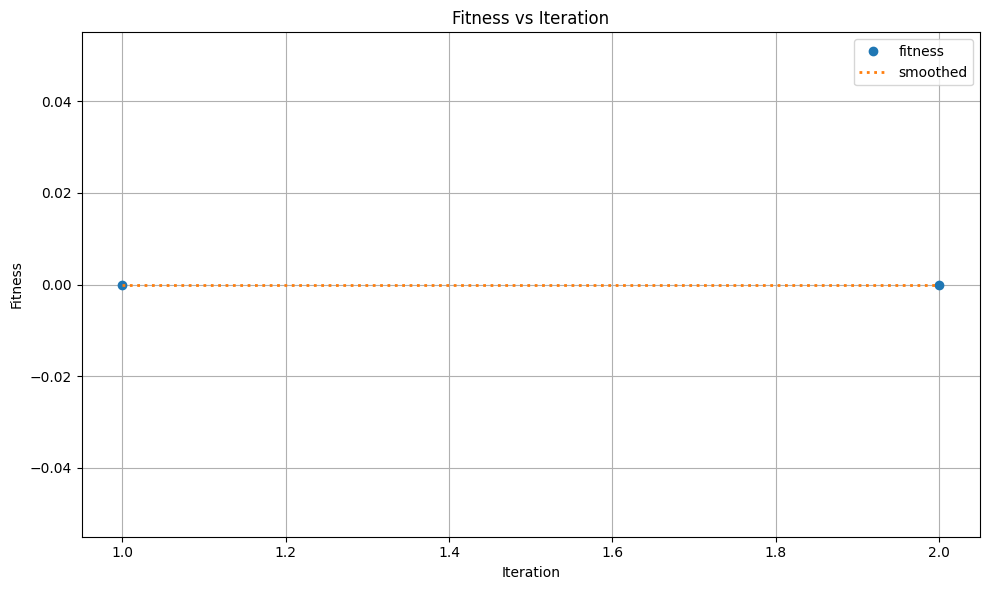

In [18]:
model.tune(data='/kaggle/working/yellow-4/data.yaml', epochs = 30, iterations=300, optimizer='AdamW', plots=False, save = False, val= False)

In [13]:
# %load /kaggle/working/runs/detect/tune/best_hyperparameters.yaml
# 10/10 iterations complete ✅ (202.63s)
# Results saved to runs/detect/tune
# Best fitness=0.0 observed at iteration 1
# Best fitness metrics are {}
# Best fitness model is runs/detect/train
# Best fitness hyperparameters are printed below.

lr0: 0.01
lrf: 0.01
momentum: 0.937
weight_decay: 0.0005
warmup_epochs: 3.0
warmup_momentum: 0.8
box: 7.5
cls: 0.5
dfl: 1.5
hsv_h: 0.015
hsv_s: 0.7
hsv_v: 0.4
degrees: 0.0
translate: 0.1
scale: 0.5
shear: 0.0
perspective: 0.0
flipud: 0.0
fliplr: 0.5
bgr: 0.0
mosaic: 1.0
mixup: 0.0
copy_paste: 0.0
